# Download data

In [1]:
! wget -O mri.zip "https://nyu.box.com/shared/static/yklozx5humfm3uuhwi72byociclkap9s.zip"

--2021-03-09 12:44:12--  https://nyu.box.com/shared/static/yklozx5humfm3uuhwi72byociclkap9s.zip
Resolving nyu.box.com (nyu.box.com)... 107.152.29.197
Connecting to nyu.box.com (nyu.box.com)|107.152.29.197|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /public/static/yklozx5humfm3uuhwi72byociclkap9s.zip [following]
--2021-03-09 12:44:12--  https://nyu.box.com/public/static/yklozx5humfm3uuhwi72byociclkap9s.zip
Reusing existing connection to nyu.box.com:443.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://nyu.app.box.com/public/static/yklozx5humfm3uuhwi72byociclkap9s.zip [following]
--2021-03-09 12:44:12--  https://nyu.app.box.com/public/static/yklozx5humfm3uuhwi72byociclkap9s.zip
Resolving nyu.app.box.com (nyu.app.box.com)... 107.152.29.201
Connecting to nyu.app.box.com (nyu.app.box.com)|107.152.29.201|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://public.boxcloud.com/d/1/b

In [2]:
! unzip mri.zip

Archive:  mri.zip
   creating: mri/
  inflating: __MACOSX/._mri          
  inflating: mri/image_knee.mat      
  inflating: __MACOSX/mri/._image_knee.mat  


In [4]:
ls mri

image_knee.mat


In [1]:
data_path = './mri/'

In [5]:
import numpy as np
from scipy.io import loadmat
import matplotlib.pyplot as plt
import matplotlib.colors as colors
%matplotlib inline

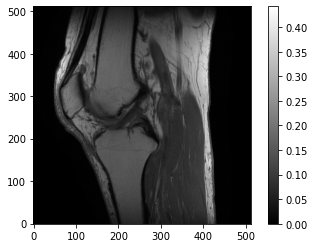

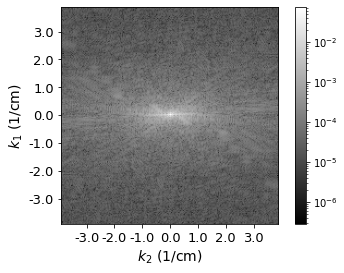

In [9]:
knee_im_aux = 1000 * np.flipud(loadmat(data_path+'image_knee.mat')['image_knee'].T)
knee_im = np.flipud(knee_im_aux)
n = knee_im.shape[0]

factor = 20
ticks = np.arange(0,n,100)
tick_labels = ticks / factor

plt.figure()
plt.imshow(knee_im,origin='lower',cmap='gray')
plt.colorbar()

knee_ft = np.fft.fft2(knee_im) 
fc = 100
# f_ticks = np.arange(0,2*fc+2,50)
# f_tick_labels = np.arange(-fc,fc+1,20)*(factor/n)
f_tick_labels = np.arange(-3.0,3.1,1.0)
f_ticks = fc + f_tick_labels / (factor/n)
aux_diff = int((n-2*fc)/2)
knee_ft_aux = np.fft.fftshift(np.abs(knee_ft))/ n**2
knee_ft_plot = knee_ft_aux[aux_diff:(n-aux_diff),aux_diff:(n-aux_diff)]
plt.figure()
ax = plt.gca()
sim =plt.imshow(knee_ft_plot,norm=colors.LogNorm(),origin='lower',cmap='gray')
plt.colorbar()
ax.set_xticks(f_ticks)
ax.set_xticklabels(f_tick_labels)
ax.set_yticks(f_ticks)
ax.set_yticklabels(f_tick_labels)
plt.ylabel(r'$k_1$ (1/cm)',fontsize=14)
plt.xlabel(r'$k_2$ (1/cm)',fontsize=14)
plt.tick_params(labelsize=13)
#plt.savefig('plots/mri_ft.pdf',bbox_inches="tight")
# 20 cm x 20 cm

ind_x: 10 ind_y: 10
ind_x: 10 ind_y: 100
ind_x: 100 ind_y: 10
ind_x: 100 ind_y: 100


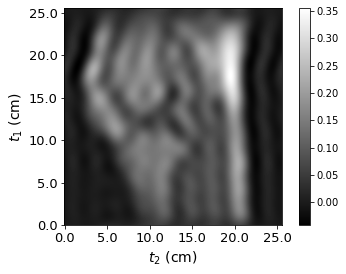

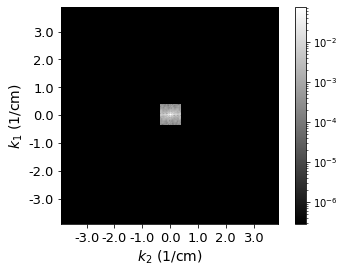

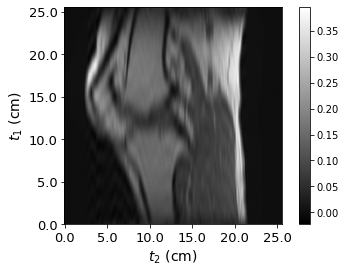

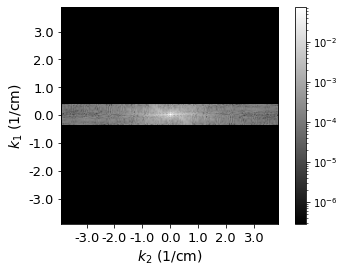

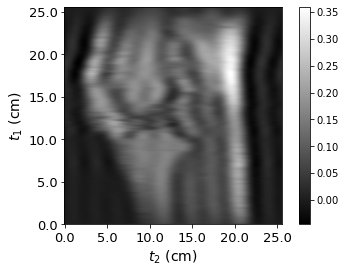

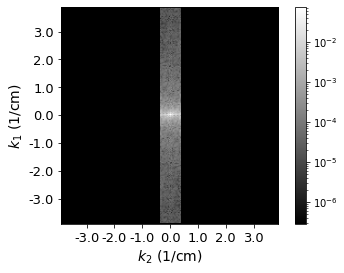

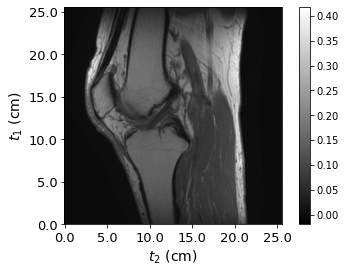

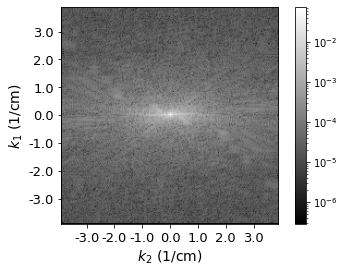

In [12]:
inds= [10,100]
for ind_x in inds:
    for ind_y in inds:
        print('ind_x: ' + str(ind_x) + ' ind_y: ' + str(ind_y))
        ft_lowpass = np.copy(knee_ft)
        ft_lowpass[ind_x:(n-ind_x+1),:] = 0
        ft_lowpass[:,ind_y:(n-ind_y+1)] = 0
        im_lowpass = np.fft.ifft2(ft_lowpass)
        plt.figure()
        ax = plt.gca()
        im = plt.imshow(np.real(im_lowpass),origin='lower',cmap='gray')
        ax.set_xticks(ticks)
        ax.set_xticklabels(tick_labels)
        ax.set_yticks(ticks)
        ax.set_yticklabels(tick_labels)
        plt.ylabel(r'$t_1$ (cm)',fontsize=14)
        plt.xlabel(r'$t_2$ (cm)',fontsize=14)
        plt.tick_params(labelsize=13)
        plt.colorbar()
        # plt.title('ind_x: ' + str(ind_x) + ' ind_y: ' + str(ind_y))
        #plt.savefig('plots/mri_lowpass_' + str(ind_x) + '_y' + str(ind_y)+'.pdf',bbox_inches="tight")
        
        knee_ft_lowpass_aux = np.fft.fftshift(np.abs(ft_lowpass))/ n**2
        knee_ft_lowpass_plot = knee_ft_lowpass_aux[aux_diff:(n-aux_diff),aux_diff:(n-aux_diff)]
        knee_ft_lowpass_plot[knee_ft_lowpass_plot==0] = np.min(knee_ft_plot)
        plt.figure()
        ax = plt.gca()
        im =plt.imshow(knee_ft_lowpass_plot,norm=colors.LogNorm(),origin='lower',cmap='gray')
        plt.colorbar()
        ax.set_xticks(f_ticks)
        ax.set_xticklabels(f_tick_labels)
        ax.set_yticks(f_ticks)
        ax.set_yticklabels(f_tick_labels)
        plt.ylabel(r'$k_1$ (1/cm)',fontsize=14)
        plt.xlabel(r'$k_2$ (1/cm)',fontsize=14)
        plt.tick_params(labelsize=13)
        #plt.savefig('plots/mri_lowpass_' + str(ind_x) + '_y' + str(ind_y)+'_ft.pdf',bbox_inches="tight")